# Sentiment Analysis
---
---

**O este relatório foi escrito por:**

Rodrigo Sousa Marques

rmarques.engineer@gmail.com

+55 63 99230.2552


#Situação:
---
O cliente B4 Bank é um aplicativo do setor financeiro que tem como objetivo conseguir uma **maior visibilidade e retenção de usuários** de forma orgânica. 
<br><br>
Como esse mercado tem crescido muito e é muito competitivo, ele resolveu investir em ASO com o RankMyApp, focando seus esforços não só em visualizações mas também em instalações, ou seja, não apenas os usuários visualizarão o app na loja como também irão instalá-lo e utilizá-lo por um longo período de tempo. (Retenção de 15-30 dias).


#Problema:
---
O B4 Bank é cliente há alguns meses e eles gostariam de saber como tem sido a performance do app.

Como trabalhamos com ASO para este cliente, o que mais nos interessa são as métricas de Canal Orgânico. É a partir deste KPI que nos baseamos para verificar o impacto do nosso trabalho.

O cliente também deseja ter insights sobre o que os usuários estão comentando na loja e qual a sua situação diante dos seus concorrentes. 


#Conclusão
---


**Reviews:**

> De maneira geral, os usuários do App do B4 Bank estão bem satisfeitos com os produtos/serviços oferecidos. Podemos percener um alto volume de avaliações com 5 estrelas como também a dominância de palavas que expressam sentimentos positivos quando analisamos os textos dos reviews.

> Embora quem baixou o app se mostra satisfeito, percebe-se uma baixa taixa de conversão dos usuários que visitam a loja e os que efetivamente efetuam o download do app. Para atacar esse problema, sugiro uma análise mais profunda do comportamento dos usuários como: 

* As keywords utilizadas na busca, 
* Estudo de reviews de aplicativos similares para comparação, 
* Análise mais profunda dos reviews negativos para atacar os problemas mais sérios ou mais mencionados.

<br>

**Modelo de Machine Learning:**
> O modelo apresentou de forma geral um boa performance na análise dos sentimentos dos usuários nos reviews do app na loja. Esse modelo pode ser utilizado na analise dos reviews de aplicativos concorrentes para gerar insights de possíveis problemas que o app B4 Bank pode vir a encarar. 



              precision    recall  f1-score   support

    Negative       0.97      0.94      0.95       185
     Neutral       1.00      0.94      0.97       169
    Positive       0.89      0.97      0.93       153








#Descrição dos dados
---

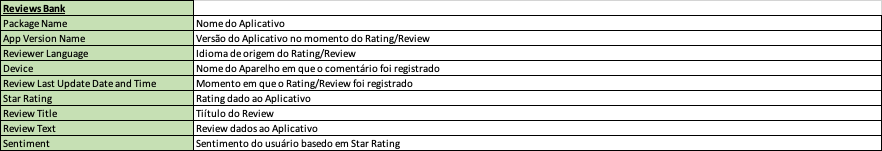

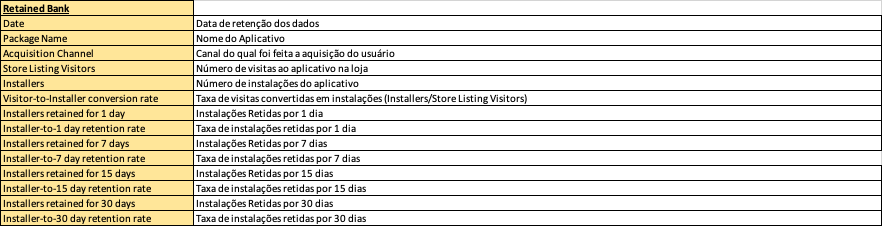

# Setup das bibliotecas e dos dados
---

##Bibliotecas

In [3]:
#@title Importando as principais bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

#@markdown * Processamento de texto.
import string 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#@markdown * Vetorização. 
from sklearn.feature_extraction.text import CountVectorizer

#@markdown * Tf-idf.
from sklearn.feature_extraction.text import TfidfTransformer

#@markdown * Contadores.
from collections import Counter

#@markdown * WordCloud.
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodrigo.marques\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodrigo.marques\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#@markdown * Setup dos plots

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

## Dados

In [6]:
#@markdown * Importando dados
df_reviews = pd.read_excel('./dataset.xlsx', sheet_name = 'Reviews_Bank')
df_retained = pd.read_excel('./dataset.xlsx', sheet_name = 'Retained_Bank')

reviews = df_reviews.copy()
retained = df_retained.copy()

In [4]:
reviews.head()

,Package Name,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Title,Review Text,Sentiment
0,B4 Bank,6.10.6,pt,dreamlte,2019-10-01T00:44:18Z,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
1,B4 Bank,6.10.6,pt,dream2lte,2019-10-01T12:40:15Z,2,NaN,"A versão para Android é muito lenta, os comand...",Negative
2,B4 Bank,6.10.6,pt,jackpotlte,2019-10-01T16:22:48Z,1,NaN,Atualizei e todas as vezes que entro no Banco ...,Negative
3,B4 Bank,6.10.6,pt,a5xelte,2019-10-01T17:48:29Z,1,NaN,Ruim,Negative
4,B4 Bank,6.10.6,pt,albus,2019-10-01T17:53:00Z,1,NaN,NaN,Negative


In [5]:
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Package Name                      5679 non-null   object
 1   App Version Name                  5423 non-null   object
 2   Reviewer Language                 5679 non-null   object
 3   Device                            5673 non-null   object
 4   Review Last Update Date and Time  5679 non-null   object
 5   Star Rating                       5679 non-null   int64 
 6   Review Title                      1 non-null      object
 7   Review Text                       2756 non-null   object
 8   Sentiment                         1428 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.4+ KB


,Star Rating
count,5679.000000
mean,4.398486
std,1.135829
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
retained.head()

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800


In [7]:
retained.info()
retained.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  317 non-null    object 
 1   Package Name                          317 non-null    object 
 2   Acquisition Channel                   317 non-null    object 
 3   Store Listing Visitors                317 non-null    int64  
 4   Installers                            317 non-null    int64  
 5   Visitor-to-Installer conversion rate  317 non-null    float64
 6   Installers retained for 1 day         317 non-null    int64  
 7   Installer-to-1 day retention rate     317 non-null    float64
 8   Installers retained for 7 days        317 non-null    int64  
 9   Installer-to-7 days retention rate    317 non-null    float64
 10  Installers retained for 15 days       317 non-null    int64  
 11  Installer-to-15 day

,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1041.201893,143.880126,0.142915,121.747634,123.739284,113.630915,60.644382,109.514196,48.009088,105.091483,32.215413
std,1231.963441,175.450807,0.080868,154.328494,328.722443,147.485934,237.566314,143.769277,212.501082,139.995347,174.942679
min,51.000000,3.000000,0.007000,3.000000,0.429000,2.000000,0.286000,2.000000,0.286000,2.000000,0.222000
25%,105.000000,12.000000,0.086000,11.000000,0.750000,10.000000,0.667000,9.000000,0.615000,9.000000,0.571000
50%,458.000000,33.000000,0.144000,25.000000,0.867000,24.000000,0.808000,23.000000,0.778000,21.000000,0.750000
75%,1584.000000,275.000000,0.204000,208.000000,0.906000,189.000000,0.864000,181.000000,0.848000,174.000000,0.818000
max,8292.000000,875.000000,0.314000,809.000000,1000.000000,784.000000,1000.000000,768.000000,1000.000000,751.000000,1000.000000


## Limpeza dos dados

### Retained

In [8]:
#@markdown * Filtro canal organico

retained = retained[retained['Date'] != '31/09/2019']                           # drop wrong date
retained['Date'] = pd.to_datetime(retained['Date'], format='%Y-%m-%d')          # convert dates


organic = retained.loc[retained['Acquisition Channel'] == 'Organic'] 
organic = organic.drop(['Package Name','Acquisition Channel'], axis =1)

organic.head()

,Date,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
3,2019-08-02,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
7,2019-08-03,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848
11,2019-08-04,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805
15,2019-08-05,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810


In [9]:
#@markdown * Separando contagens / proporções

count_cat = ['Date','Store Listing Visitors', 'Installers','Installers retained for 1 day','Installers retained for 7 days','Installers retained for 15 days','Installers retained for 30 days']
rates_cat = ['Date','Visitor-to-Installer conversion rate', 'Installer-to-1 day retention rate','Installer-to-7 days retention rate','Installer-to-15 days retention rate','Installer-to-30 days retention rate']

organic_counts = organic[count_cat]
organic_rates = organic[rates_cat]


In [10]:
organic_counts.head()

,Date,Store Listing Visitors,Installers,Installers retained for 1 day,Installers retained for 7 days,Installers retained for 15 days,Installers retained for 30 days
0,2019-08-01,1628,414,359,344,335,330
3,2019-08-02,1610,407,354,338,330,322
7,2019-08-03,1725,401,360,348,348,340
11,2019-08-04,1579,410,365,350,341,330
15,2019-08-05,1488,374,334,323,317,303


In [11]:
organic_rates.head()

,Date,Visitor-to-Installer conversion rate,Installer-to-1 day retention rate,Installer-to-7 days retention rate,Installer-to-15 days retention rate,Installer-to-30 days retention rate
0,2019-08-01,0.254,0.867,0.831,0.809,0.797
3,2019-08-02,0.253,0.870,0.830,0.811,0.791
7,2019-08-03,0.232,0.898,0.868,0.868,0.848
11,2019-08-04,0.260,0.890,0.854,0.832,0.805
15,2019-08-05,0.251,0.893,0.864,0.848,0.810


### Reviews

In [12]:
#@markdown * Convertendo datas.
reviews['Review Last Update Date and Time'] = pd.to_datetime(reviews['Review Last Update Date and Time'], format='%Y-%m-%d')  

#@markdown * Excluindo colunas desnecessárias.
reviews = reviews.drop(['Package Name','Review Title'], axis =1)

#@markdown * Preenchendo dados faltantes com [Espaço].
reviews['Review Text'] = reviews['Review Text'].fillna('')
reviews['Sentiment'] = reviews['Sentiment'].fillna('')
reviews.head()


,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Text,Sentiment
0,6.10.6,pt,dreamlte,2019-10-01 00:44:18+00:00,2,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
1,6.10.6,pt,dream2lte,2019-10-01 12:40:15+00:00,2,"A versão para Android é muito lenta, os comand...",Negative
2,6.10.6,pt,jackpotlte,2019-10-01 16:22:48+00:00,1,Atualizei e todas as vezes que entro no Banco ...,Negative
3,6.10.6,pt,a5xelte,2019-10-01 17:48:29+00:00,1,Ruim,Negative
4,6.10.6,pt,albus,2019-10-01 17:53:00+00:00,1,,Negative


#Visibilidade, conversão e retenção
---

O principal objetivo do ASO (App Store Optimization) é melhorar a visibilidade de aplicativos móveis nas lojas, a fim de melhorar a descoberta em Pesquisa, Gráficos em destaque e Apresentados, e obter mais instalações orgânicas.





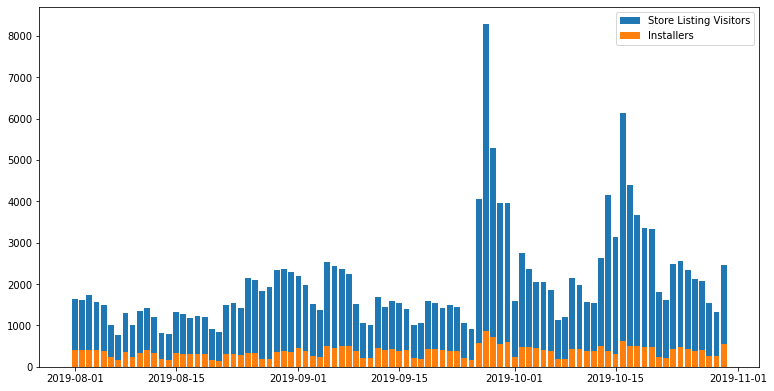

In [13]:
#@title Quantidade de Visitas X Quantidade de Instalações

#@markdown * Para termos uma melhor perspectiva de quantos usuários estão visitando o app na Loja de Aplicativos, o grafico a seguir mostra as contagens de visitas e de instalações no decorrer do tempo.



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(organic_counts['Date'], organic_counts['Store Listing Visitors'], label="Store Listing Visitors")
ax.bar(organic_counts['Date'], organic_counts['Installers'], label="Installers")
ax.legend();

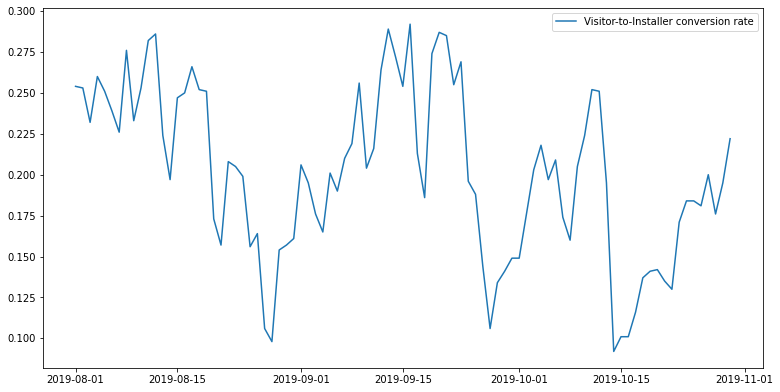

In [14]:
#@title Relação de Conversão: Visitantes X Downloads
#@markdown * Uma outra perspectiva do gráfico acima é a apresentada no seguinte gráfico. 

#@markdown * Percebe-se uma taxa de conversão (Visitantes X Downloads) variando entre 10 e 30%.

#@markdown * Uma sugestão para futura exploração é a analise das *keywords* utilizadas pelos usuários na busca do aplicativo B4 Bank.



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(organic_rates['Date'], organic_rates['Visitor-to-Installer conversion rate'], label="Visitor-to-Installer conversion rate")
ax.plot()
ax.legend();

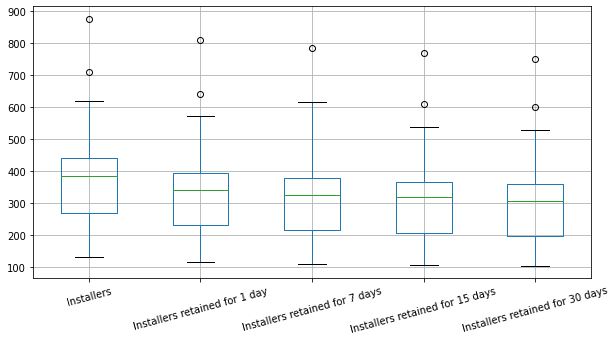

In [15]:
#@title Retenção dos usuários


organic_counts.drop(['Store Listing Visitors'], axis = 1).boxplot(rot=15); 

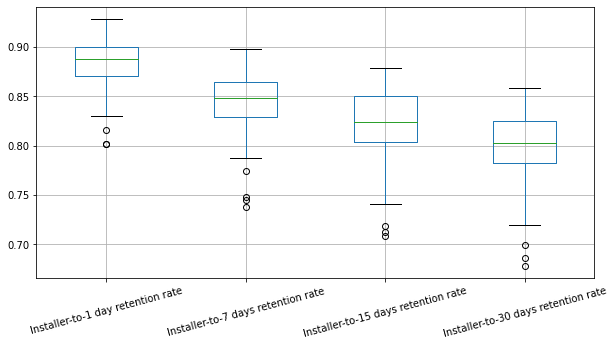

In [16]:
#@title Taixa de retenção

#@markdown * Percebe-se que com o passar dos dias a taixa de tetenção dos usuáios cai de aproximadamente 90% para o primeiro dia para cerca de 80% após 30 dias de download do App.
#@markdown * Com isso tem-se que após 30 dias de uso, 20% dos usuários irão apagar o App.
#@markdown * Sugiro um plano de avaliação dos motivos de insatisfação desses usuários bem como um plano de ação focado na retenção desses.



organic_rates.drop(['Visitor-to-Installer conversion rate'], axis = 1).boxplot(rot=15);

#Exploração Analítica dos Dados
---

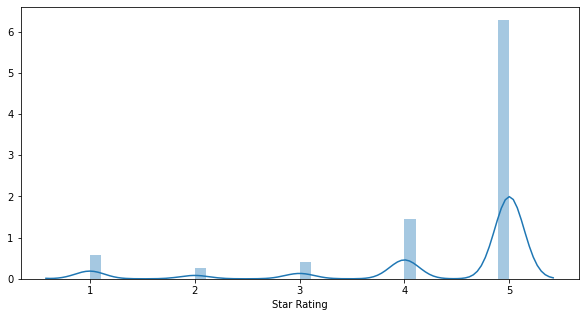

In [17]:
#@title Distribuição das avaliações em Star Rating

#@markdown * Aqui podemos confirmar novamente a satisfação dos usuários do App com mais de 60% das avaliações sendo 5 estrelas.

sns.distplot(reviews['Star Rating']);



In [18]:
#@markdown * Preparação dos daods para análise exploratória.

cat = ['Review Text', 'Sentiment']
sentiment = ['Positive', 'Negative', 'Neutral']

select_setiment = reviews[cat]
select_setiment = select_setiment[(select_setiment['Sentiment'].isin(sentiment))]

reviews_clean = select_setiment[select_setiment['Review Text'] != '']


In [19]:
#@title Hipótese: O tamanho dos reviews pode indicar o sentimento do usuário?

#@markdown * Para avaliar se o tamanho do texto tem alguma corelação com o sentimento do review, primeiro é preciso adicionar uma coluna no nosso dataframe com o tamanho da mensagem.


reviews_clean['length'] = reviews_clean['Review Text'].apply(len)
reviews_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Review Text,Sentiment,length
0,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative,129
1,"A versão para Android é muito lenta, os comand...",Negative,150
2,Atualizei e todas as vezes que entro no Banco ...,Negative,73
3,Ruim,Negative,4
5,Tá bem ruim... despois da última atualização n...,Negative,339


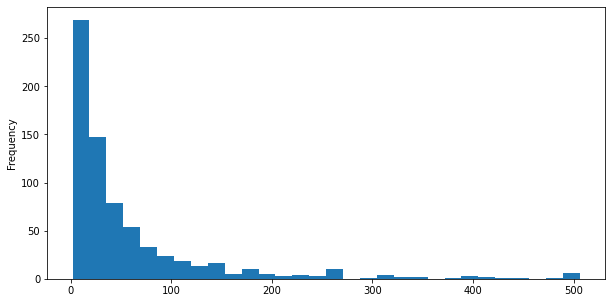

In [20]:
#@title Analisando o tamanho dos reviews
#@markdown * Grande maioria dos reviews tem menos de 100 caracteres. 


reviews_clean['length'].plot(bins = 30, kind='hist');

In [21]:
#@markdown * Existe um comentário de 500 caracteres, vamos checar esse review e verificar o teor da mensagem.


reviews_clean['length'].describe()

count    718.000000
mean      58.796657
std       83.625955
min        2.000000
25%       12.000000
50%       27.000000
75%       65.750000
max      506.000000
Name: length, dtype: float64

In [22]:
#@title Review mais longo do App:

#@markdown * Através de uma simples exploração pudemos verificar uma informação valiosa com sugestões de um usuário.

#@markdown * Embora seja um sinal de que a hipótese esteja correta, vamos verificá-la a seguir.

reviews_clean[reviews_clean['length'] == 506]['Review Text'].iloc[0]

'Sugestão: - Integrar as funcionalidades do app B4 Bankcard dentro do B4 Bank B4 Banknalité; - Gerenciar as comprar realizadas pelos cartões vinculados a conta (assim, cada gasto do cartão especificado); - Criar gráficos mais coloridos para serem de fácil identificação de categoria; - Mostrar as porcentagens de gastos em casa categoria em relação a todos os gastos do mês; - Criar categorias mais genéricas e subcategorias (por exemplo, categoria - casa, subcategorias - água, luz...); - Criar orçamentos.'

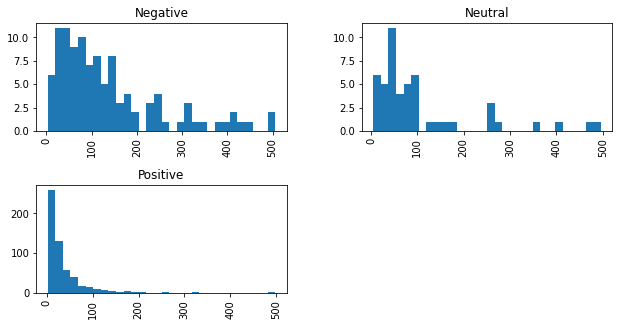

In [23]:
#@title Avaliando a hipótese 
#@markdown * Aparentemente não existe nenhuma correlação entre o tamanho da mensagem e o sentimento do usuário que o escreveu.

#@markdown * Percebe-se que a maioria dos comentários no entanto gira em torno de 100 caracteres.

#@markdown * Isso sugere que devemos fazer uma análise mais profinda dos reviews pra prever melhor o sentimento dos usuários.

reviews_clean.hist('length', by='Sentiment', bins=30);


#WordCloud
---
As nuvens de palavras decompõem rapidamente o texto de um artigo ou pesquisa e permitem que o visualizador veja quais palavras são usadas com mais ou menos frequência. Quanto maior o tamanho de uma palavra na nuvem, mais frequentemente ela é usada.

As nuvens de palavras permitem que os visualizadores avaliem rapidamente qual texto é o mais popular ou usado no conteúdo selecionado. Uma das  características mais atraentes das nuvens de palavras é que elas permitem que os visualizadores entendam rapidamente uma grande quantidade de dados sem contar ou se debruçar sobre as notas.

*Dito isso, irei utilizar a técnica de WordCloud para melhor visualizar os dados textuais dos reviews.*


##Pré-Processamento do Texto


In [24]:
#@markdown * Setup das stopwords em Português.

stopwords = nltk.corpus.stopwords.words('portuguese')
new_words=('app', 'aplicativo', 'nao', 'vezes', 'bank', 'banco' , 'pra', 'consegue', 'consigo', 'deveria', 'ser', 'fundiona', 'fazer')

for i in new_words:
    stopwords.append(i)
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [25]:
#@markdown * Para melhor analizar os sentimentos, os dados serão agrupados por sentimento. 

#@markdown * As palavras mais comuns da lingua serão desconsideradas (stopwords) para que possamos focar nas palavras mais relevantes.

data = reviews_clean

# Dividindo classes
positive_reviews = data[data['Sentiment'] == 'Positive']
negative_reviews = data[data['Sentiment'] == 'Negative']
neutral_reviews = data[data['Sentiment'] == 'Neutral']

# Processando pontuação e stopwords 

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords)
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


# Text analysis
#data.Sentiment.value_counts()


##Visualizações

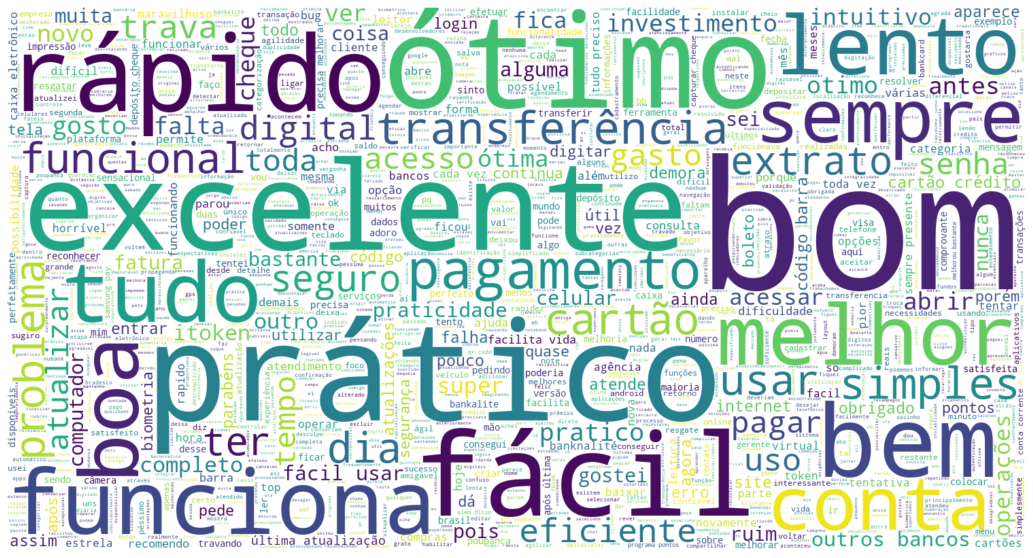

In [26]:
#@title Todos os Reviews
#@markdown * Temos abaixo a relação das palavras mais comuns nos reviews do app.

#@markdown * Percebe-se o destaque nas palavras relacionadas a sentimentos positivos. 

#@markdown * Isso indica que de maneira geral o aplicativo B4 Bank tem uma boa reputação entre seus usuários.

words = " ".join(data['Review Text'])
      
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,stopwords=stopwords, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
#plt.title('Todos os Reviews\n',size=25)
plt.show()

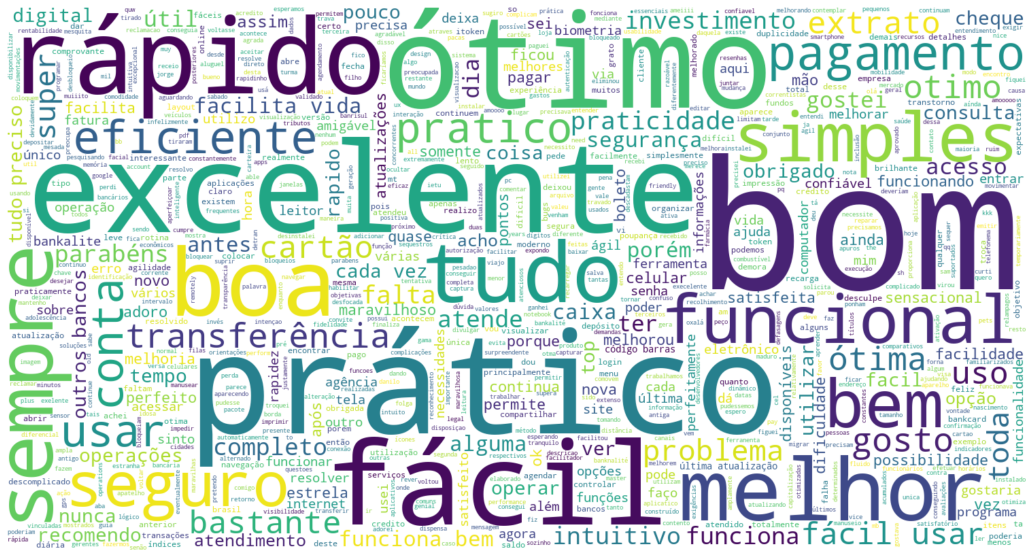

In [27]:
#@title Reviews Positivos 
#@markdown * A WordCloud a seguir confirma a força do sentimento positivo dos usuários e sugere que eles estão, de maneira geral, satisfeitos com o app.


words = " ".join(positive_reviews['Review Text'])

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stopwords, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
#plt.title('Reviews Positivos\n',size=25)
plt.show()

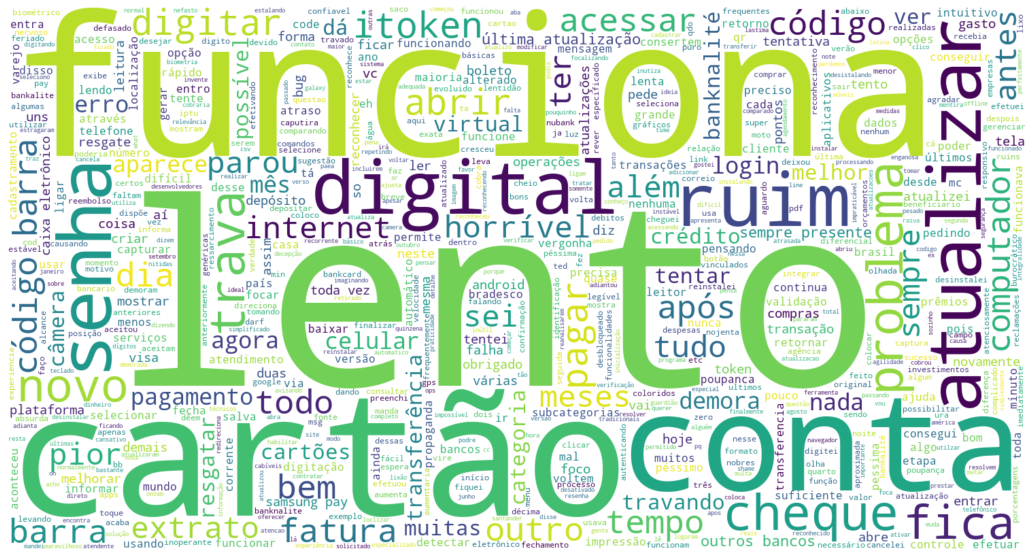

In [28]:
#@title Reviews Negativos 

#@markdown A WordCloud dos reviews negativos nos indica algumas categorias de atenção, como:

#@markdown * Velocidade do app

#@markdown * Senha

#@markdown * Atualizações: Podendo ser do próprio app ou de dados/documentos.

#@markdown Uma análise mais profunda sobre as causas relacionadas aos sentimentos negativos pode ser alvo de um futuro projeto mais específico. 



words = " ".join(negative_reviews['Review Text'])

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stopwords, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
#plt.title('Reviews Negativos\n',size=25)
plt.show()

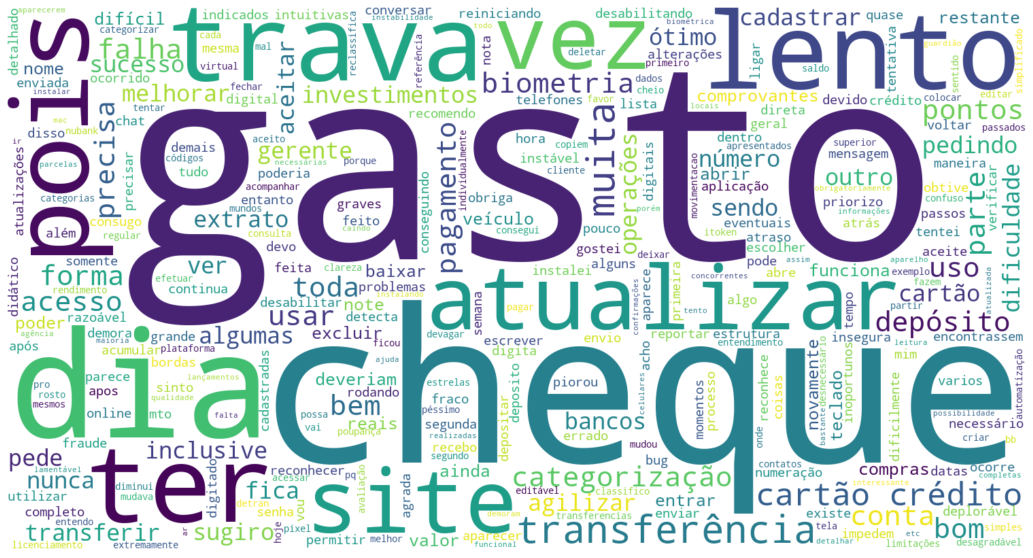

In [29]:
#@title Reviews Neutros

#@markdown A WordCloud dos reviews neutros também nos indica algumas categorias de atenção. 
#@markdown Reviews neutros podem vir de usutários que são satisfeitos com o app, porém experiemntaram algum problema relacionado a um serviço.


words = " ".join(neutral_reviews['Review Text'])


words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=stopwords, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
#plt.title('Reviews Neutros\n',size=25)
plt.show()

#NLP - Processamento de Linguagem Natural
---
Para ser possível treinar os dados de texto em um modelo d ML é preciso que esse texto seja pre processado:

* Excluir palavras muito comuns do vocamulário (stopwords) - já realizado.
* Converter cada mensagem em uma lista de palavras (vetorizaçao).
* Normalizar bag of words




##Vetorização e Normalização

A vetorização implica em converter cada mensagem, representada como uma lista de tokens (lemas) acima, em um vetor que os modelos de aprendizado de máquina possam entender. Faremos isso em três etapas usando o modelo do saco de palavras (*bag of words*):

* Contar quantas vezes uma palavra ocorre em cada mensagem: conhecido como frequência de termo (Term Frequency)
* Pesar as contagens, de modo que tokens frequentes tenham peso menor: frequência inversa do documento (*inverse document frequency*)
* Normalizar os vetores para o comprimento da unidade, para abstrair do comprimento do texto original (norma L2)

**Para a Vetorizção será utilizado método de CountVectorizer do scikit-learn.**
<br><br>

## TF-IDF

Após a contagem, a ponderação e normalização do termo podem ser feitas com TF-IDF, usando o TfidfTransformer do scikit-learn.
TF-IDF significa frequência de documento de frequência inversa de frequência, e o peso tf-idf é um peso frequentemente usado na recuperação de informações e mineração de texto. Esse peso é uma medida estatística usada para avaliar a importância de uma palavra para um documento em uma coleção ou corpus. A importância aumenta proporcionalmente ao número de vezes que uma palavra aparece no documento, mas é compensada pela frequência da palavra no corpus. Variações do esquema de ponderação tf-idf são frequentemente usadas pelos mecanismos de pesquisa como uma ferramenta central para pontuar e classificar a relevância de um documento, dada uma consulta do usuário.
<br><br>
**Para a TF-IDF será utilizado método TfidfTransformer também do scikit-learn.**



## Treiando o modelo de Machine Learning
---




In [30]:
#@markdown * Os dados estão bem desbalanceados, então é preciso utilizar uma técnica de OverSampling dos dados de sentimentos negativo e neutro para que nosso modelo não tenda a prever somente resultados positivos. 

#@markdown * **14% Negative, 6.8% Neutral, 78.4 Positive.**

X = reviews_clean['Review Text']
y = reviews_clean['Sentiment']


counter = Counter(y)
print(counter)

Counter({'Positive': 563, 'Negative': 106, 'Neutral': 49})


Random over-sampling:
Negative    563
Positive    563
Neutral     563
Name: Sentiment, dtype: int64


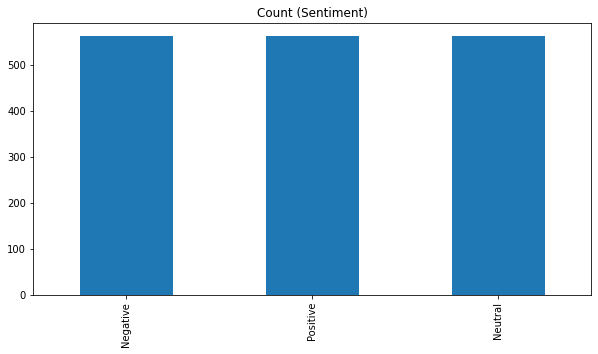

In [31]:
#@markdown * Para realizar esse balanceamento é necessário extrair exemplos aleatórios de cada um dos sentimentos minoritários e catenar os dados para que os 3 sentimentos estejam proporcionais entre si.

#@markdown * Realizado o procedimento, temos uma amostra de 563 reviews de cada classe de sentimento.


data = reviews_clean

# Class count
count_pos, count_neg, count_neut = data.Sentiment.value_counts()

# Divide by class
positive_reviews = data[data['Sentiment'] == 'Positive']
negative_reviews = data[data['Sentiment'] == 'Negative']
neutral_reviews = data[data['Sentiment'] == 'Neutral']


negative_reviews_over = negative_reviews.sample(count_pos, replace=True)
neutral_reviews_over = neutral_reviews.sample(count_pos, replace=True)

df_over = pd.concat([positive_reviews, negative_reviews_over, neutral_reviews_over], axis=0)

print('Random over-sampling:')
print(df_over.Sentiment.value_counts())

df_over.Sentiment.value_counts().plot(kind='bar', title='Count (Sentiment)');




In [32]:
#@markdown * Com os dados balanceados é possivel realizar o train_test_split.
#@markdown * Abaixo temos respectivamente os tamanhos dos datasetes, train, test e total

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

txt_train, txt_test, sentiment_train, sentiment_test = train_test_split(df_over['Review Text'], df_over['Sentiment'], test_size=0.3)

print(len(txt_train), len(txt_test), len(txt_train) + len(txt_test))

1182 507 1689


In [33]:
#@title Pipeline
#@markdown A classe Pipeline é uma funcionalidade do Scikit-Learn que ajuda criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhando entre times de cientista e engenheiro de dados.
#@markdown Em NLP é comum criar um pipeline com os processos de vetorização e normalização do texto para todo o dataset.

#@markdown Para este projeto o pipeline é definido para executar os seguintes processos:
#@markdown * CountVectorizer: Tokenizar os textos para a bag of words.
#@markdown * TfidfTransformer: Contagens inteiras para pontuações TF-IDF ponderadas.
#@markdown * DecisionTreeClassifier: Como modelo de aprendizagem.

from sklearn.pipeline import Pipeline

steps = [('bow', CountVectorizer(analyzer=punctuation_stop)),  
         ('tfidf', TfidfTransformer()),  
         ('classifier', DecisionTreeClassifier()),
] 


pipeline = Pipeline(steps=steps)

In [34]:
pipeline.fit(txt_train, sentiment_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function punctuation_stop at 0x7f65edd4f8c8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                       

#Avaliação do Modelo
---


In [35]:
predictions = pipeline.predict(txt_test)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(predictions,sentiment_test))

              precision    recall  f1-score   support

    Negative       0.97      0.94      0.95       185
     Neutral       1.00      0.94      0.97       169
    Positive       0.89      0.97      0.93       153

    accuracy                           0.95       507
   macro avg       0.95      0.95      0.95       507
weighted avg       0.95      0.95      0.95       507

